직선보다는 곡선으로 설명하는 것이 적절할 때는 단순회귀분석은 부적합하다. 이럴 때 다항 함수를 사용하면 보다 복잡한 곡선 형태의 회귀선을 표현할 수 있다.

`다항회귀분석`(`Polynomial Regression`)은 2차함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘이다. 예를 들어, 2차 함수는 종속 변수 Y와 독립 변수 X 사이의 관계를 $Y = aX^2 + bX + c$로 표시하여 설명한다. 다항회귀분석 모형은 학습을 통해 3개의 계수 $a$, $b$, $c$를 찾아서 모형을 완성한다.

# Step 1 ~ Step 5
단순회귀분석의 Step 1~Step 5까지 과정을 다시 거친다. 훈련 데이터 278개와 검증 데이터 120개로 나뉜다.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X = ndf[['weight']]  #독립 변수 X
y = ndf['mpg']  #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('훈련 데이터: ', X_train.shape)
# 훈련 데이터:  (278, 1)
print('검증 데이터: ', X_test.shape)
# 검증 데이터:  (120, 1)

훈련 데이터:  (278, 1)
검증 데이터:  (120, 1)


# Step 6 - 모델 학습 및 검증
`sklearn` 라이브러리에서 선형회귀분석을 위한 `LinearRegression()` 함수와 다항식 변환을 위한 `PolynomialFeatures()` 함수를 불러온다.

`PolynomialFeatures(degree=2)`를 통해 2차항(제곱항)까지의 변환을 적용하는 다항식 변환 객체인 `poly`를 생성한다. 변환된 데이터는 원래의 특성, 각 특성의 제곱, 모든 특성 쌍의 곱을 포함하게 된다. 1차 함수를 제곱하면 2차 함수가 되는 것과 같은 원리로 이해하면 된다.

독립 변수로 사용할 `X_train` 데이터를 `fit_transform()` 메서드에 전달하면, 2차항 회귀분석에 맞게 변환된다. `X_train`의 1개 열이 `X_train_poly`에서는 3개 열로 늘어난다. 독립 변수 X 하나에 대해 [$1$, $X$, $X^2$]와 같이 3개의 특성으로 변환되는 것이다.

여기서 $1$은 상수항, $X$는 원래의 특성, $X^2$은 원래 특성의 제곱을 나타낸다.


In [24]:
# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression  #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures  #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)  #2차항 적용
X_train_poly = poly.fit_transform(X_train)  #X_train 데이터를 2차항으로 변형
display(X_train.head())
display(X_train_poly)

print('원본 데이터: ', X_train.shape)
# 원본 데이터:  (278, 1)
print('2차항 변환 데이터: ', X_train_poly.shape)
# 2차항 변환 데이터:  (278, 3)

,weight
397,2720.0
25,4615.0
279,2135.0
260,3620.0
130,2451.0


array([[1.0000000e+00, 2.7200000e+03, 7.3984000e+06],
       [1.0000000e+00, 4.6150000e+03, 2.1298225e+07],
       [1.0000000e+00, 2.1350000e+03, 4.5582250e+06],
       [1.0000000e+00, 3.6200000e+03, 1.3104400e+07],
       [1.0000000e+00, 2.4510000e+03, 6.0074010e+06],
       [1.0000000e+00, 2.9000000e+03, 8.4100000e+06],
       [1.0000000e+00, 2.6350000e+03, 6.9432250e+06],
       [1.0000000e+00, 2.6720000e+03, 7.1395840e+06],
       [1.0000000e+00, 3.3530000e+03, 1.1242609e+07],
       [1.0000000e+00, 3.3800000e+03, 1.1424400e+07],
       [1.0000000e+00, 3.6640000e+03, 1.3424896e+07],
       [1.0000000e+00, 3.3650000e+03, 1.1323225e+07],
       [1.0000000e+00, 4.4400000e+03, 1.9713600e+07],
       [1.0000000e+00, 2.7550000e+03, 7.5900250e+06],
       [1.0000000e+00, 2.1080000e+03, 4.4436640e+06],
       [1.0000000e+00, 3.1400000e+03, 9.8596000e+06],
       [1.0000000e+00, 2.1880000e+03, 4.7873440e+06],
       [1.0000000e+00, 3.3020000e+03, 1.0903204e+07],
       [1.0000000e+00, 4.165

원본 데이터:  (278, 1)
2차항 변환 데이터:  (278, 3)


`LinearRegression()` 함수로 회귀분석 모형 객체를 생성하고, 2차항으로 변환된 훈련 데이터 (`X_train_poly`, `y_train`)를 `fit()` 메서드에 전달하여 `pr` 모형을 학습시킨다.

모형 학습이 완료되면 검증 데이터를 사용하여 모형의 예측 능력을 평가한다. 검증 데이터 또한 `poly` 객체를 사용하여 2차항으로 변환해주어야 한다. `score()` 메서드로 모형의 결정계수를 구한다.

단순선형회귀 분석에서는 0.689였던 결정계수가 0.726으로 향상되었다. 평가지표상으로는 모델의 예측력이 개선된 것으로 해석할 수 있다.

In [26]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)  #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly, y_test)
print('R^2 결정계수: ', r_square)
# R^2 결정계수:  0.7255470154177004

R^2 결정계수:  0.7255470154177004


훈련 데이터의 분포와 학습된 모형의 회귀선을 그래프로 출력해서 비교해보자. 2차항으로 변환된 검증 데이터(`X_test_poly`)를 `predict()` 메서드에 입력하여 예측한 결과인 `y_hat_test`를 빨간점(`+`)으로 표시하면 회귀선이 된다. 모형의 결정계수가 높아진 것에도 알 수 있듯이 직선으로 표시된 단순회귀분석에 비해 데이터의 패턴을 더욱 잘 설명한다고 말할 수 있다.

[30.73115148 30.95768877 29.98516501 30.62372128 32.82683675 32.65762232
 29.22218255 16.44326345 32.73650872 28.29247608 26.30412998 29.90080455
 32.71395541 24.0354647  25.68314094 24.34494496 22.75729161 15.03514169
 12.45600038 27.19060312 20.3545186  12.77128562 32.48905342 20.63380807
 24.97444912 27.36688385 24.16766874 21.32955729 26.27563208 25.89812748
 17.51627469 13.96808816 29.93241821 13.87154917 34.20379126 26.65772712
 31.60092158 16.04371142 19.26250205 13.52807829 32.32113006 25.52521331
 17.64954581 20.30959852 33.28123115 34.19214594 18.55003261 14.09746574
 24.88365925 17.09341179 21.59844378 19.31202688 21.29029488 20.3845227
 32.54517133 33.1672022  20.94016092 15.4866741  32.43300724 29.09822398
 29.86921672 23.1706013  34.02941259 15.39147194 31.54602301 16.27030545
 23.64272576 17.91988376 16.31617511 28.07127807 19.49720704 31.00098219
 23.04334633 23.39270579 31.60092158 30.89283473 14.61014197 21.21980331
 15.00480199 13.84546135 32.09823639 32.60136096 27.

Text(0, 0.5, 'mpg')

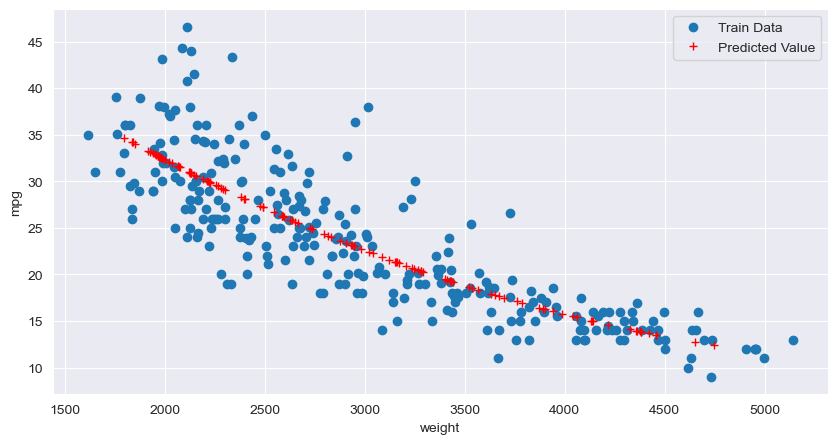

In [32]:
y_hat_test = pr.predict(X_test_poly)
print(y_hat_test)

fig, axe = plt.subplots(1, 1, figsize=(10, 5))
axe.plot(X_train, y_train, 'o', label='Train Data')
axe.plot(X_test, y_hat_test, 'r+', label='Predicted Value')
axe.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')

실제값 `y_test`와 모델의 예측값 `y_hat_test`의 차이를 제곱한 `squared_error` 열의 평균을 계산하여 평균 제곱 오차(MSE)를 측정할 수 있다. 단순 선형회귀에서는 17.897이었는데 다항 선형회귀에서는 15.814로 오차가 감소했다. 결정계수가 개선된 것과 같은 해석이 가능하다.

In [36]:
# 모델에 test data 데이터를 입력하여 예측한 값 y_hat_test를 실제 값 y_test와 비교 
X_ploy = poly.fit_transform(X_test)

# 오차 계산
test_preds = pd.DataFrame(y_test)
test_preds.columns = ['y_test']
test_preds['y_hat'] = y_hat_test
test_preds['squared_error'] = (test_preds['y_hat'] - test_preds['y_test']) ** 2
display(test_preds)

# 평균 제곱 오차
mse = test_preds['squared_error'].mean()
print('mse: ', mse)

,y_test,y_hat,squared_error
331,33.8,30.731151,9.417831
111,18.0,30.957689,167.901698
350,34.7,29.985165,22.229669
205,28.0,30.623721,6.883913
56,26.0,32.826837,46.605700
...,...,...,...
17,21.0,26.256648,27.632346
225,17.5,18.651897,1.326866
223,15.5,14.979598,0.270818
59,23.0,29.575642,43.239069


mse:  15.813520500513526


`sklearn`의 `mean_squared_error()` 함수를 사용하면 평균 제곱 오차(MSE)를 간편하게 구할 수 있다.  `mean_squared_error()` 함수의 인자로 실제값(`y_test`)과 예측값(`y_hat_test`)을 순서대로 입력하면 앞에서 계산한 MSE와 동일한 값을 얻는다.

In [37]:
# 사이킷런 함수 활용 (평균 제곱 오차)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_hat_test)
print('mse: ', mse)

mse:  15.813520500513526


다음은 `sklearn`의 `mean_absolute_error()` 함수를 사용해서 회귀모델의 평가지표 중 하나인 평균 절대값 오차(MAE: Mean Absolute Error)를 계산하는 방법이다.

In [38]:
# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_hat_test)
print('mae: ', mae)

mae:  3.140565073444954


시각화를 통해 모델의 예측 성능과 오차의 특성을 분석해보자. 회귀 플롯과 커널 밀도 그래프를 보면 평가지표가 개선된 것과 다르게 단순 선형회귀분석 결과와 큰 차이가 없어보인다. 특히 커널 밀도 그래프의 오차 분포를 보면 200까지 위치한 것을 볼 수 있다. 단순 선형회귀분석에서는 오차가 최대 160 정도였던 점을 감안하면, 특정 데이터에 대해서는 예측력이 떨어진 것으로 보인다.

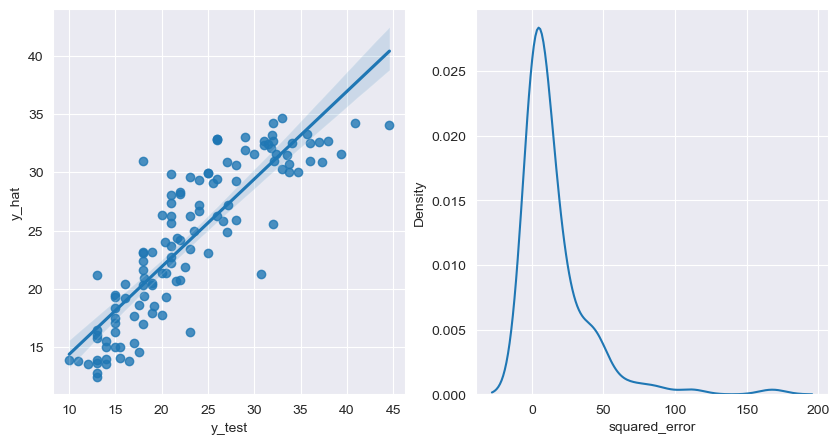

In [39]:
# 오차 분석
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.regplot(x='y_test', y='y_hat', data=test_preds, ax=axes[0]);
sns.kdeplot(x='squared_error', data=test_preds, ax=axes[1]);